In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(79)
m = 100 # number of observation
X = 3 * np.random.rand(m,1) # column vector
y = 5 * X + np.random.rand(m,1) # column vector

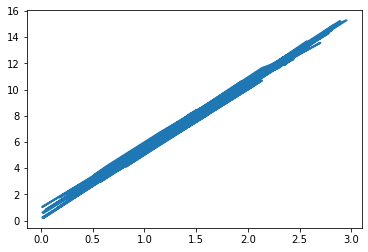

In [3]:
# plot
fig, ax = plt.subplots()
ax.plot(X, y, linewidth=2.0)
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

In [5]:
X_b = add_dummy_feature(X) # add x0=1 to each observation

In [6]:
# this is the normal equation that minimizes the cost function 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y 
theta_best

array([[0.45383577],
       [5.02107898]])

In [7]:
# Make prediction
X_new = [[0], [3]]
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[ 0.45383577],
       [15.5170727 ]])

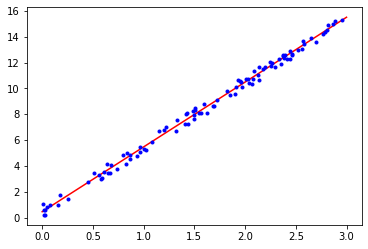

In [8]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [9]:
# Using Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X, y)
# Bias term - Intercept; Feature weight - Coefficient
print(f"Intercept of the model: {lin_reg_model.intercept_}, "+\
      f"Coefficient: {lin_reg_model.coef_}")
# Prediction
lin_reg_model.predict(X_new)

# LinearRegression class uses SVD method with complexity O(n^2).
# Both, Normal equation and SVD get slow if number of features
# grows large (e.g. 100,000). However, both are linear with
# regard to number of observations in the training set i.e. they 
# are O(m) and hence, both can handle large training datasets
# efficiently, provided they can fit in memory.

Intercept of the model: [0.45383577], Coefficient: [[5.02107898]]


array([[ 0.45383577],
       [15.5170727 ]])

In [10]:
# Using Moore-Penrose inverse to find theta i.e. theta = pseudoinverse(X)*y
# Normal equation may not work if X.T @ X is not invertible (e.g. m < n or 
# some feature is redundant. However, pseudoinverse is always defined).

# Pseudoinverse is computed using SVD: X = U@S@V.T => X+ = V@S+@U.T, 
# where, S+ is obtained from S, by setting all values lesser than a threshold 
# value to zero, then replacing all non-zero values with their inverses, and 
# finally transposing the resulting matrix.

# Moreover, computational complexity of calculating X.T @ X is (n+1)*(n+1)
# i.e. O(n^2). Complexity of inverting such a matrix ~ O(n^2.4) to O(n^3)
theta_mp_inv = np.linalg.pinv(X_b) @ y # 

In [11]:
theta_best - theta_mp_inv

array([[ 1.79856130e-14],
       [-1.15463195e-14]])